<a href="https://colab.research.google.com/github/ShreyaAN10/LearnDeepLearning/blob/main/MultiClassClassification_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports

In [ ]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

## Create toy dataset


torch.Size([200, 2]) torch.Size([200])


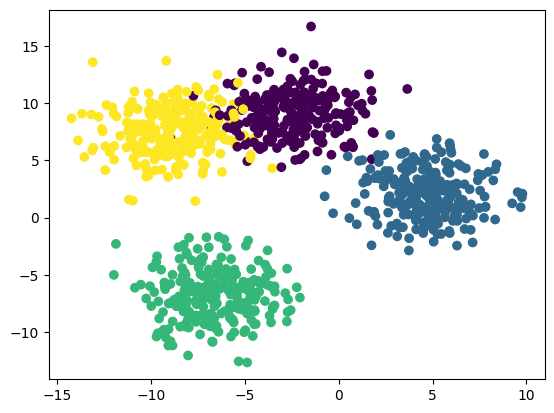

In [ ]:
# set hyperparameters for make_blob
N_CLASSES = 4
N_FEATURES = 2
N_SAMPLES = 1000
RANDOM_SEED = 42

# create multiclass data
X_blob, y_blob = make_blobs(n_samples=N_SAMPLES,
                            n_features=N_FEATURES,
                            centers=N_CLASSES,
                            cluster_std=2,
                            random_state=RANDOM_SEED)

# convert data to tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.long)

# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_blob,
                                                    y_blob,
                                                    test_size=0.2,
                                                    random_state=RANDOM_SEED)

# len(X_train), len(y_train)
print(X_test.shape, y_test.shape)

# plot data
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob)

## Create model

In [ ]:
# make device agnostic
device = "gpu" if torch.cuda.is_available() else "cpu"
device

'cpu'

### Create class and instantiate a model

In [ ]:
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8) -> None:
    # practise writing docstrings
    """Initialises multi-class classification model

    Args:
        input_features (int): number of input feature to the model
        output_features (int): number of output classes
        hidden_units (int): number of hidden units between layers, default 8

    Returns:

    Raises:

    Example:

    """
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_features)
    )

  def forward(self, x):
    return self.layer_stack(x)

# instantiate the class
model = BlobModel(input_features=2,
                  output_features=4,
                  hidden_units=8).to(device)
print(model)

print(model.state_dict())

BlobModel(
  (layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)
OrderedDict([('layer_stack.0.weight', tensor([[-0.5014, -0.5777],
        [-0.6977,  0.6933],
        [-0.1350, -0.4339],
        [ 0.6273,  0.4208],
        [-0.1738,  0.2616],
        [-0.6663,  0.2319],
        [ 0.6186, -0.0064],
        [ 0.6604,  0.0609]])), ('layer_stack.0.bias', tensor([-0.0759,  0.4250,  0.5913, -0.0137, -0.4037, -0.1788, -0.3684,  0.4140])), ('layer_stack.2.weight', tensor([[ 0.2305, -0.2991,  0.0759,  0.0293,  0.3441,  0.3406, -0.1423,  0.2426],
        [ 0.3137, -0.1517, -0.0938,  0.2100, -0.0220,  0.1412,  0.2301, -0.2377],
        [-0.2657, -0.3169, -0.1638, -0.0670,  0.3125, -0.1222,  0.3393,  0.2285],
        [ 0.1238, -0.2966, -0.2666, -0.3249, -0.0086,  0.1722, -0.0474,  0.0572],
        [ 0.3439,  0.197

### Initlize loss and optimizer

In [ ]:
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params=model.parameters(),
                            lr=0.1)

def accuracy_fn(preds, actual):
  correct = torch.eq(preds, actual).sum().item()
  return (correct / len(preds)) * 100

What do the model's logits look like?

In [ ]:
with torch.inference_mode():
  model.eval()
  print(X_test.dtype)
  y_logits = model(X_test)

y_logits[:10]

torch.float32


tensor([[ 0.1100,  0.7039,  0.4549, -0.3940],
        [ 0.0954,  0.1701,  0.7237, -0.3553],
        [-0.4779,  1.7829, -0.7611, -0.7844],
        [ 0.1934,  0.6027,  0.1639, -0.1787],
        [-0.1100,  0.1574,  0.6883, -0.6282],
        [ 0.0772,  0.2947,  0.9207, -0.4669],
        [-0.3054,  1.7449, -1.0195, -1.0103],
        [-0.0348,  0.1612,  0.5040, -0.4438],
        [-0.8284,  1.8676, -0.4689, -0.6562],
        [-0.0637,  0.1601,  0.5247, -0.4914]])

to make sense of these outputs i.e convert logits into prediction probabilities, for multiclass classification, we use the `softmax output activation`

In [ ]:
y_pred_probs = torch.softmax(y_logits, dim=1)
y_pred_probs[:10]

tensor([[0.2072, 0.3752, 0.2925, 0.1251],
        [0.2179, 0.2348, 0.4084, 0.1389],
        [0.0828, 0.7939, 0.0624, 0.0609],
        [0.2400, 0.3615, 0.2331, 0.1655],
        [0.1952, 0.2550, 0.4336, 0.1162],
        [0.1943, 0.2415, 0.4516, 0.1127],
        [0.1025, 0.7966, 0.0502, 0.0507],
        [0.2176, 0.2648, 0.3730, 0.1446],
        [0.0542, 0.8037, 0.0777, 0.0644],
        [0.2126, 0.2659, 0.3829, 0.1386]])

If you notice, all rows sum up to 1. This implies, for each class, the model outputs a probability of prediction.

In order to derive the class/label with the highest probability, use the `argmax` function.

In [ ]:
torch.max(y_pred_probs[0])

tensor(0.3752)

In [ ]:
torch.argmax(y_pred_probs[0])

tensor(1)

This implies that the prediction is Class 3

In [ ]:
# let's do this for all datapoints

torch.argmax(torch.softmax(y_logits, dim=1), dim=1)

tensor([1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 1,
        1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2,
        2, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2,
        1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1,
        1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1,
        1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 1, 2,
        1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2,
        1, 2, 1, 2, 2, 1, 1, 1])

In [ ]:
y_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

> logits (raw output of the model) -> pred probs (use `torch.softmax()`) -> pred_labels (use `torch.argmax()`)

In [ ]:
def plot_convergence(epochs,
                     loss,
                     test_loss):
  plt.plot(epochs, torch.tensor(loss).detach().numpy(), label="Training Loss")
  plt.plot(epochs, torch.tensor(test_loss).detach().numpy(), label="Testing Loss")
  plt.show()

In [ ]:
### Training and Testing

def train_test(model,
               epochs,
               X_train=X_train,
               X_test=X_test,
               y_train=y_train,
               y_test=y_test,
               loss_fn=loss_fn,
               optimizer=optimizer):

  epoch_count = []
  loss_values = []
  test_loss_values = []

  for epoch in range(epochs):
    model.train()
    y_logits = model(X_train)
    y_preds = torch.argmax(torch.softmax(y_logits, dim=1), dim=1)

    loss = loss_fn(y_logits, y_train)
    accuracy = accuracy_fn(y_preds, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    with torch.inference_mode():
      model.eval()
      test_logits = model(X_test)
      test_preds = torch.argmax(torch.softmax(test_logits, dim=1), dim=1)
      test_loss = loss_fn(test_logits, y_test)
      test_accuracy = accuracy_fn(test_preds, y_test)

    if epoch % 10 == 0:
      print(f"Epoch: {epoch} | [Training] loss: {loss:.2f} accuracy: {accuracy:.2f} | [Testing] loss: {test_loss:.2f} accuracy: {test_accuracy:.2f}")
      epoch_count.append(epoch)
      loss_values.append(loss)
      test_loss_values.append(test_loss)

  return epoch_count, loss_values, test_loss_values

Epoch: 0 | [Training] loss: 1.73 accuracy: 23.62 | [Testing] loss: 1.25 accuracy: 46.00
Epoch: 10 | [Training] loss: 0.63 accuracy: 77.50 | [Testing] loss: 0.63 accuracy: 77.50
Epoch: 20 | [Training] loss: 0.47 accuracy: 84.12 | [Testing] loss: 0.46 accuracy: 87.50
Epoch: 30 | [Training] loss: 0.38 accuracy: 93.25 | [Testing] loss: 0.36 accuracy: 95.50
Epoch: 40 | [Training] loss: 0.33 accuracy: 95.00 | [Testing] loss: 0.31 accuracy: 96.50
Epoch: 50 | [Training] loss: 0.29 accuracy: 95.12 | [Testing] loss: 0.28 accuracy: 96.00
Epoch: 60 | [Training] loss: 0.27 accuracy: 95.50 | [Testing] loss: 0.25 accuracy: 96.50
Epoch: 70 | [Training] loss: 0.24 accuracy: 95.75 | [Testing] loss: 0.23 accuracy: 96.50
Epoch: 80 | [Training] loss: 0.22 accuracy: 95.75 | [Testing] loss: 0.21 accuracy: 96.50
Epoch: 90 | [Training] loss: 0.20 accuracy: 95.75 | [Testing] loss: 0.18 accuracy: 96.50
Epoch: 100 | [Training] loss: 0.16 accuracy: 96.00 | [Testing] loss: 0.15 accuracy: 97.00
Epoch: 110 | [Trainin

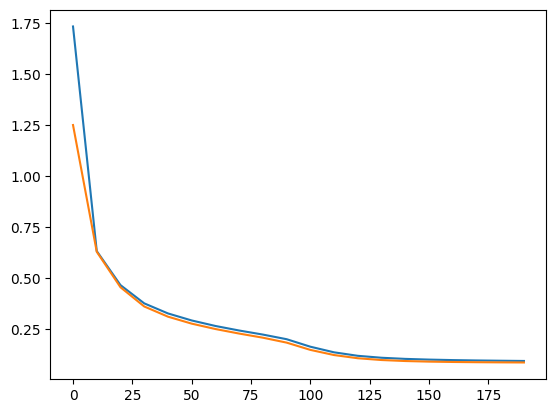

In [ ]:
# put data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

y_train.dtype

epochs, loss, test_loss = train_test(model, 200)

plot_convergence(epochs, loss, test_loss)

In [ ]:
import requests
from pathlib import Path

# download the helper function
if Path("plotdecisionboudaries.py").is_file():
  print("exists")
else:
  print("Downloading...")
  request = requests.get("https://raw.githubusercontent.com/ShreyaAN10/LearnDeepLearning/main/plotdecisionboundaries.py")
  with open("plotdecisionboundaries.py", "wb") as f:
    f.write(request.content)

from plotdecisionboundaries import plot_decision_boundaries

Downloading...


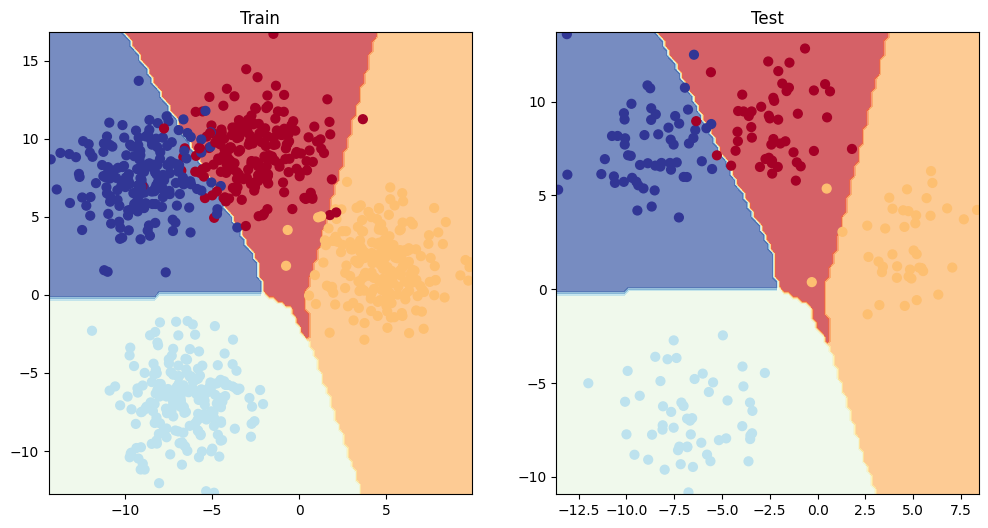

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundaries(model, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundaries(model, X_test, y_test)